Hypothesis Generation: for packaged food items
1. sales from a outlet depends on where it is located and the product type
EX. sales of pizza in village will be meagre
2. depend on avg income of a person in that particular city
ex. we cant expect good sales of a costly items from a low income person
3. if the product is more visible in the store...more chnaces of more sale
4. if product is affordable more chances of more sales
5. if the store is newly built ...then it may not be known to all so we cant expect good sales so depends on when it is built
6. brand..of the store... publicity of the store..
7. more used items will have more sales..like dals rice..oils ..necessary items

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_orig = pd.read_csv("train.csv")
test_orig = pd.read_csv("test.csv")

In [4]:
train = train_orig.copy()
test = test_orig.copy()

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### 1. undertsnad the data
1. look at the train n test data sets
2. check the features present in our dataset
3. check the data types
4. check the shape of the dataset

In [24]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [25]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [8]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [10]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [11]:
train.shape,test.shape

((8523, 12), (5681, 11))

### obs:
1. dependent feature : Item_Outlet_Sales 
    independesnt features : others
2. data types
    1. object type : Item_Identifier,Item_Fat_Content,Item_Type ,Outlet_Identifier,Outlet_Size ,Outlet_Location_Type  ,Outlet_Type 
    2. float : Item_Weight,Item_Visibility,Item_MRP ,Item_Outlet_Sales
    3.  int: Outlet_Establishment_Year 

In [23]:
#summary statistics
train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


## observations:
1. there are missing values in Item_Weight and Outlet_Size beacause the count is less for these wrt others
2. you can observe mean and median(50th percentile) (difference)
       * huge difference == mean<median:Item_MRP,Item_Outlet_Sales ---mean<median<mode ...order....left skewed
       * slight difference == Item_Weight,Item_Visibility
3. Item_Visibility.. min value == 0 -- not practical
4.  Outliers
        * if  min < q1-1.5*IQR   ...u can say there are outliers
        * if max > q1+1.5*IQR --- u can say there are outliers
5. variance(spread) --almost 0 in Item_Visibilty and very high in Item_MRP                                                     6. Item_Weight -- numeircal and Outlet_Size -- categorical ... so we will impute accordingly                        

## 2. univariate analysis
analyse each var individually
1. first lets find the 
    * categorical features (nominal and ordinal)
    * numerical features (discrete numerical features and continuous num features)

In [12]:
categorical_features = [feature for feature in train.columns if train[feature].dtype == object]
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [13]:
discrete_num_feat = [feature for feature in train.columns if train[feature].dtype != object and len(train['Item_Identifier'].unique())<=25]
cont_num_feat = [feature for feature in train.columns if train[feature].dtype != object and len(train['Item_Identifier'].unique())>25]
print("discrete numerical features ",discrete_num_feat)
print("continuous numerical features " ,cont_num_feat)

discrete numerical features  []
continuous numerical features  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [14]:
for feature in categorical_features:
    print("Number of categories in {} is {}, and the categories are {}".format(feature,len(train[feature].unique()),train[feature].unique()))
    print()

Number of categories in Item_Identifier is 1559, and the categories are ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Number of categories in Item_Fat_Content is 5, and the categories are ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Number of categories in Item_Type is 16, and the categories are ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Number of categories in Outlet_Identifier is 10, and the categories are ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Number of categories in Outlet_Size is 4, and the categories are ['Medium' nan 'High' 'Small']

Number of categories in Outlet_Location_Type is 3, and the categories are ['Tier 1' 'Tier 3' 'Tier 2']

Number of categories in Outlet_Type is 4, and the categories are ['Supermarket Type1' 'Supermarket Type2' 'Grocery

## obs:
1. there are 1559 different items being sold in 10 different outlets
2. theses 1559 items belog to 16 differebt types .. and the fat content is low_fat and regular
3. outlets are located in different cities .. cities are grouped as tier1 tier2 tier3
4. outlet sizes may be one of the  small medium and high
5. outlet types ..4..Grocery store,Supermarket type1,type2type3
### we can observe there are categorical features(nominal and ordinal)
* nominal features : Item_Identifier,Outlet_Identifier,Item_Type
* ordinal features : Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content



* we can observe low fat is represented as Low Fat,low fat,LF all represent the same and Regular and reg reperesent the same. we will take care of this in FE
* lets replace in the dataset so that we can analyse the data 

In [50]:
train.loc[(train["Item_Fat_Content"]=="low fat") | (train["Item_Fat_Content"]=="LF"),"Item_Fat_Content"] = "Low Fat"
train.loc[(train["Item_Fat_Content"]=="reg"),"Item_Fat_Content"] = "Regular"

In [51]:
# statistical analysis of numerical features
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## obs:
1. item weight varies from 4.5 to 21 
2. item visibility in the data is varying from 0 to 0.32
3. item mrp is varying from 31 to 266
4. 10 outlets establishment ...from 1985 to 2009
5. sales varying from 33 to 13086

#### now lets visualsie each variable individually
1. lets visualise categorical(nominal and cardinal)---count plot
2. visualise...numerical(discrete)-count plot and numerical(continuous)-pdf

In [52]:
ordinal_features = [ "Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Fat_Content"]

In [53]:
train["Outlet_Size"].value_counts(normalize=True)

Medium    0.456895
Small     0.390643
High      0.152462
Name: Outlet_Size, dtype: float64

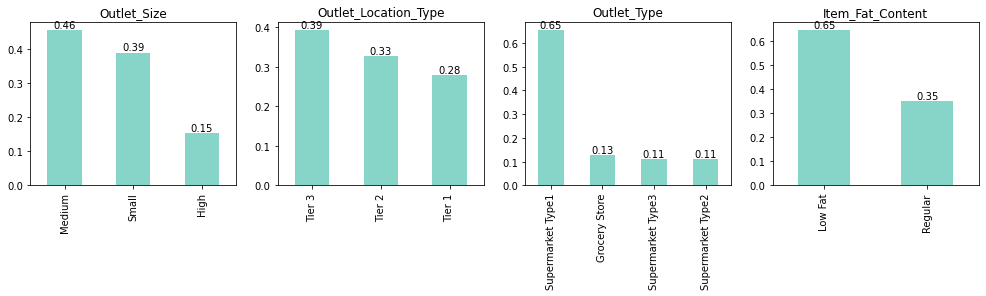

In [54]:
#plot the categorical features with the percentage of count..and value on top of the bar
fig, axes = plt.subplots(1, 4, figsize=(17, 3))
i=0
total = float(len(train))
for feature in ordinal_features:
    bars = train[feature].value_counts(normalize=True).plot.bar(title = feature,ax=axes[i],color="#87d4c9")
    for bar in bars.patches:
        bar_y_val = round(bar.get_height(),2)
        
        value_pos_x = bar.get_x() + bar.get_width() / 2.
        value_pos_y = bar.get_height()
        #plt.text(bar.get_x(), yval + .005, yval)
        bars.annotate(bar_y_val, (value_pos_x,value_pos_y),ha='center',va='bottom')
        
    i+=1
    plt.show

## obs:
1. around 45% outlets belong are medium sized
2. around 40% outlets belong to tier3 location type
3. around 65% outlets belong to super market type1
4. more than 60% items belong to lowfat


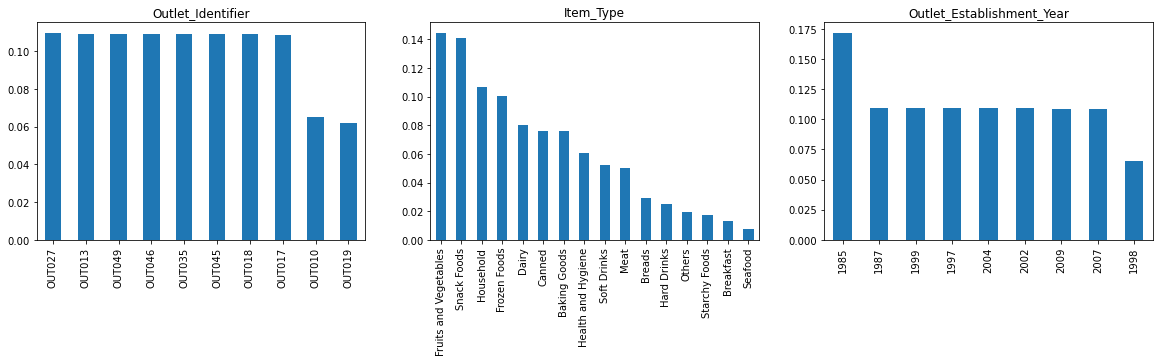

In [66]:
# there are too many Item_identifier so lets not plot it
nominal_features = ["Outlet_Identifier","Item_Type","Outlet_Establishment_Year"]
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
i=0
for feature in nominal_features:
    bars = train[feature].value_counts(normalize=True).plot.bar(title = feature,ax=axes[i])
    for bar in bars.patches:
       
        bar_y_val=round(bar.get_height(),2)
       
        values_pos_x = bar.get_x()+bar.get_width()/2
        values_pos_y = bar.get_height()
        bars.annotate(bar_y_val, (value_pos_x,value_pos_y))
        #bars.annotate(bar_y_val,(value_pos_x,value_pos_y),ha='center',va='bottom')
    i+=1
    plt.show

## observation:
1. in the data 10% of data belong to each of the store except store 19 and store 10
2. 14% of the items belong to fruits and veg ...next snack foods..the least is seafood
### Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results.

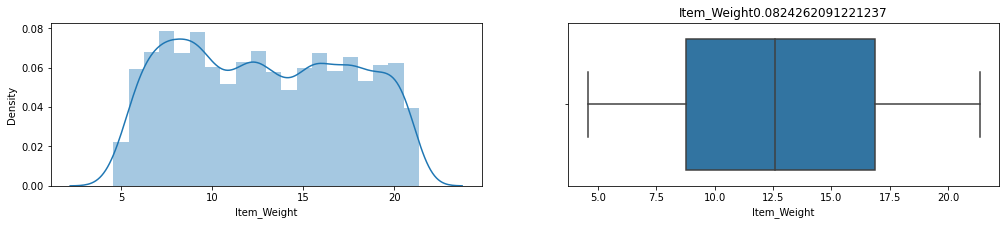

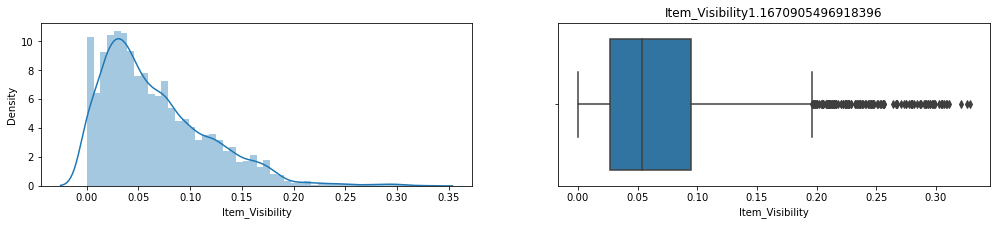

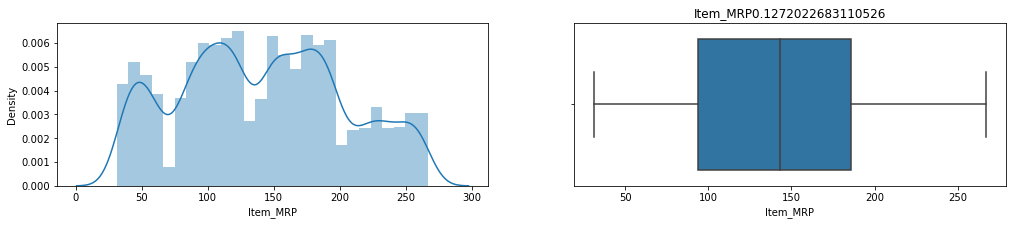

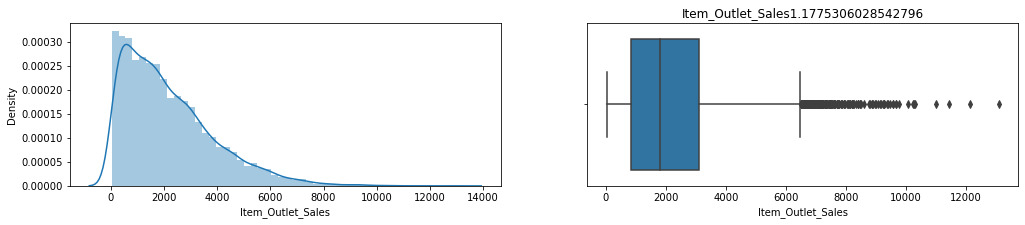

In [49]:
cont_num_feat = [feature for feature in train.columns if train[feature].dtype != object and len(train[feature].unique())>25]
for feature in cont_num_feat:
    fig, axes = plt.subplots(1, 2, figsize=(17, 3))
    sns.distplot(train[feature],ax = axes[0])
    plt.title(feature+str(train[feature].skew()))
    
    sns.boxplot(train[feature],ax=axes[1])
    
    plt.show()

## obs:
1. we can see skewness in Item_Outlet_Sales -- and outliers as well ...
DOUBT : find out whether the skewness and outliers in dependent variable has to be treated or not 
2. skewness n outliers --- Itme_Visibility
3. and also slight skewness in Outlet_Establishment_Year , Item_MRP 

## Bivariate Analysis

##### 3a) nominal categorical vs Target(Continuous)

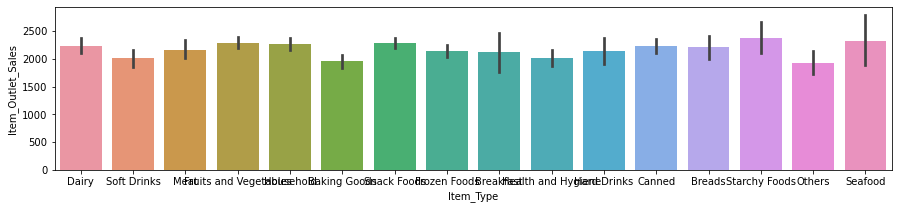

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

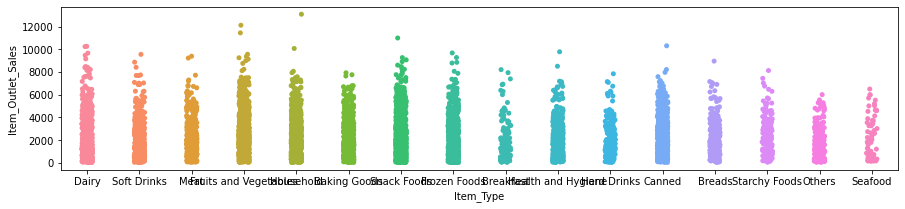

In [21]:
plt.figure(figsize=(15,3))
sns.barplot(x = "Item_Type" , y="Item_Outlet_Sales" , data=train )
plt.show()
plt.figure(figsize=(15,3))
sns.stripplot(x= "Item_Type", y= "Item_Outlet_Sales", data=train)

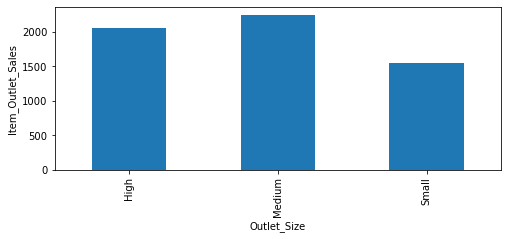

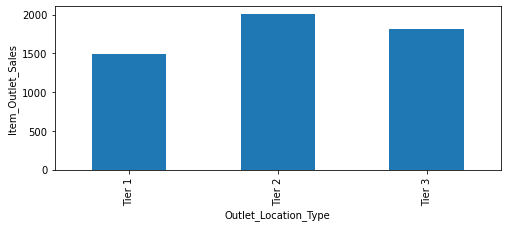

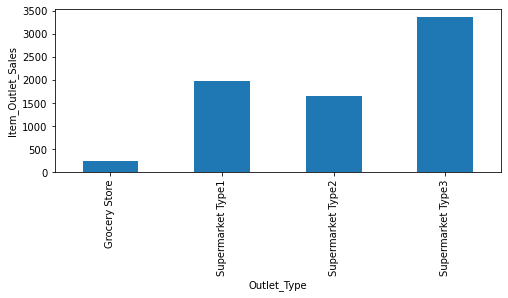

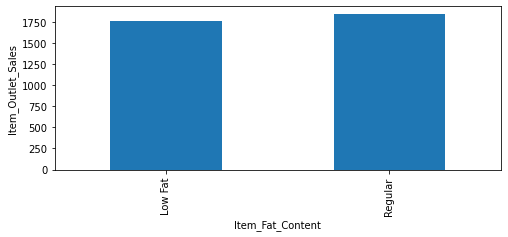

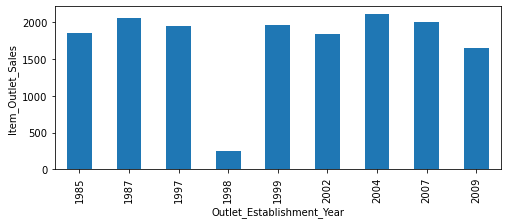

In [67]:
ordinal_features = [ "Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Fat_Content","Outlet_Establishment_Year"]
for feature in ordinal_features:
    fig = plt.figure(figsize = (8,3))
    #fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    train.groupby(by=[feature])["Item_Outlet_Sales"].median().plot.bar()
    plt.ylabel("Item_Outlet_Sales")
    #sns.boxplot(x= feature, y= "Item_Outlet_Sales", data=train ,ax = axes[1])
    #sns.stripplot(x= feature, y= "Item_Outlet_Sales", data=train ,ax = axes[2])
    #sns.barplot(x = feature , y="Item_Outlet_Sales" , data=train )
    plt.show()

### obs:
1. sales from medium sized outlet is more
2. sales from outlet in tier2 is more
3. sales from super market type3 is more
4. difference between sales from regular fat content and low fat content is vvsmall

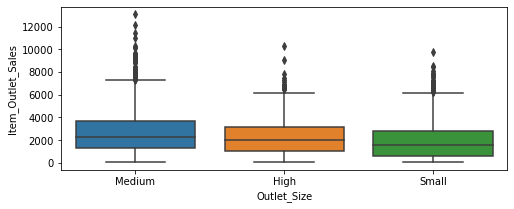

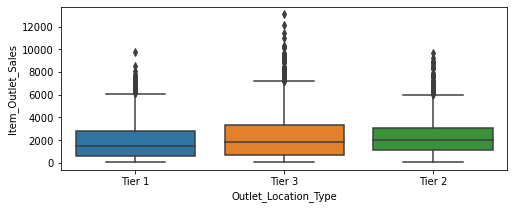

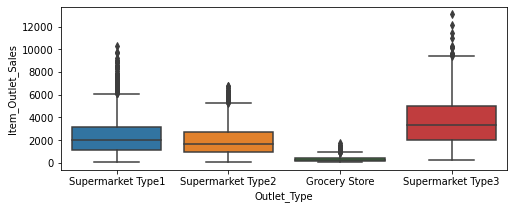

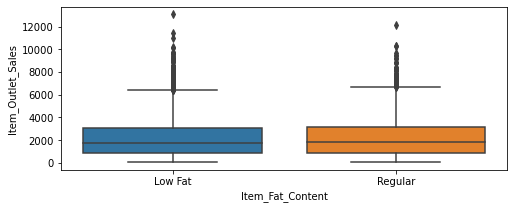

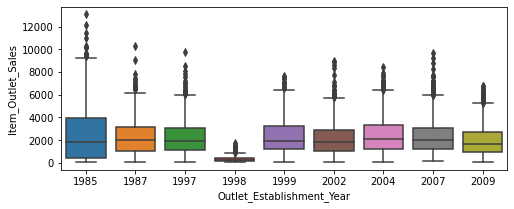

In [119]:
ordinal_features = [ "Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Fat_Content","Outlet_Establishment_Year"]
for feature in ordinal_features:
    fig = plt.figure(figsize = (8,3))
    #fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    #train.groupby(by=[feature])["Item_Outlet_Sales"].median().plot.bar()
    plt.ylabel("Item_Outlet_Sales")
    sns.boxplot(x= feature, y= "Item_Outlet_Sales", data=train )
    #sns.stripplot(x= feature, y= "Item_Outlet_Sales", data=train ,ax = axes[2])
    #sns.barplot(x = feature , y="Item_Outlet_Sales" , data=train )
    plt.show()

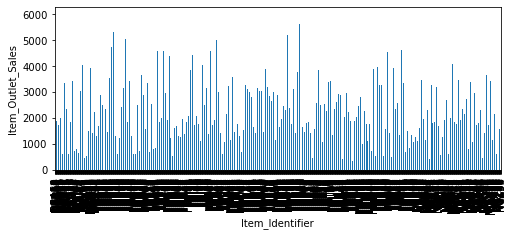

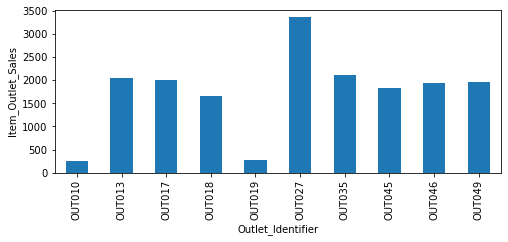

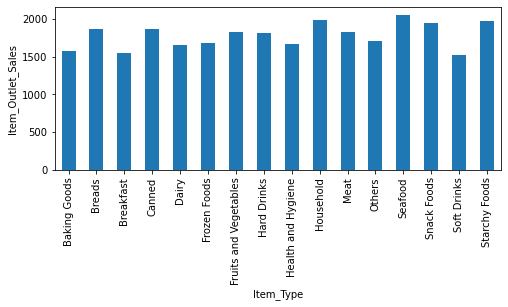

In [23]:
nominal_features = ["Item_Identifier","Outlet_Identifier","Item_Type"]
for feature in nominal_features:
    plt.figure(figsize=(8,3))
    train.groupby(by=[feature])["Item_Outlet_Sales"].median().plot.bar()
    plt.ylabel("Item_Outlet_Sales")
    #sns.barplot(x = feature , y="Item_Outlet_Sales" , data=train )
    plt.show()

## obs:
1. sales from outlet 27 is max
2. sales of seafood is max n it is more than household items ...seafoods are ususally costly..house hold items are affordable

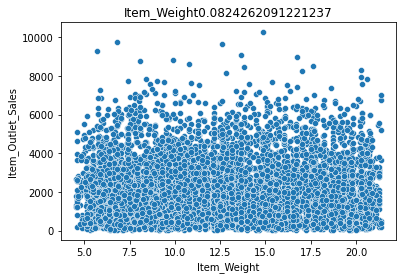

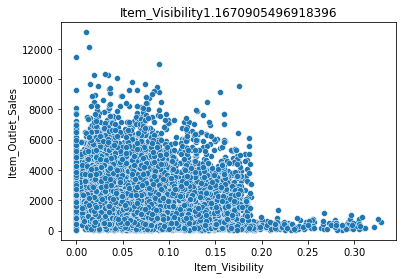

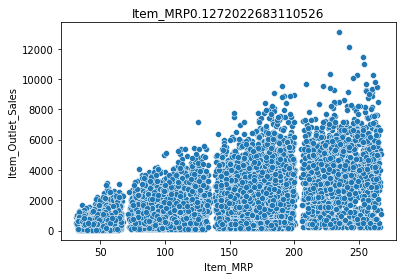

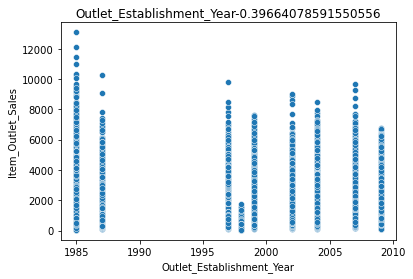

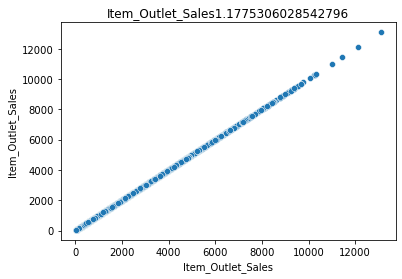

In [24]:
cont_num_feat = [feature for feature in train.columns if train[feature].dtype != object and len(train['Item_Identifier'].unique())>25]
for feature in cont_num_feat:
    #fig, axes = plt.subplots(1, 2, figsize=(17, 3))
    sns.scatterplot(x=feature , y = "Item_Outlet_Sales",data = train)
    plt.title(feature+str(train[feature].skew()))
    
    #sns.boxplot(train[feature],ax=axes[1])
    
    plt.show()

## obs:
1. Item weight is not effecting the sales
2. Item Visibility ...the less visibility ..more sales...u can see more points are clustered towards lower visibility...
But this contradicts what we assume..that higher the visisbitlty higher the sales
3. Itme_MRP .... +vely correlated
4. outlet_Establishment_Year...there is nothing like pattern...

<AxesSubplot:>

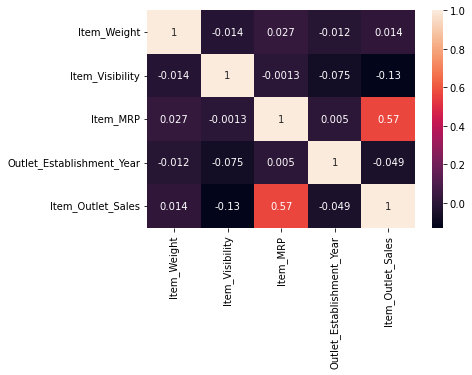

In [25]:
sns.heatmap(train.corr(),annot = True)

## obs:
1. Item_MRP ... is +vely correlated to Sales...but not very strongly as the coefficient is not very towards 1
2. 

In [26]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train["Item_Type"].value_counts()

### OBSERVATIONS:
Some observations:

1. Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
2. Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.
3. The lower ‘count’ of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check.
4. Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.
5. Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results.
6. Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.
 

Text(0.5, 1.0, 'Outlet size vs Item visibility')

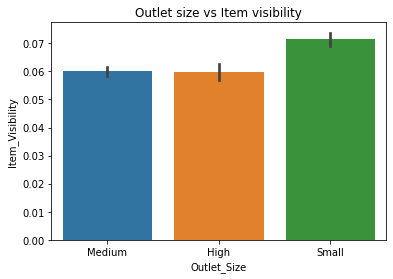

In [71]:
# AnALYSIS OF  Item_Visibility and Outlet_Type
sns.barplot(x="Outlet_Size",y="Item_Visibility",data=train)
plt.title("Outlet size vs Item visibility")

### obs:
smallest stores have high visibility

Text(0.5, 1.0, 'Outlet type vs Item Visibility')

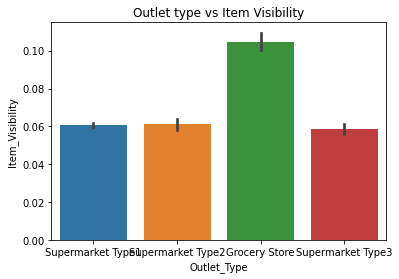

In [72]:
# analysis of Item_Visibility and Outlet_type
sns.barplot(x="Outlet_Type",y="Item_Visibility",data=train)
plt.title("Outlet type vs Item Visibility")

# obs:
prodcuts are more visible in Grocery store than any other store

Text(0.5, 1.0, 'Outlet_establishment Year vs Outlet_type')

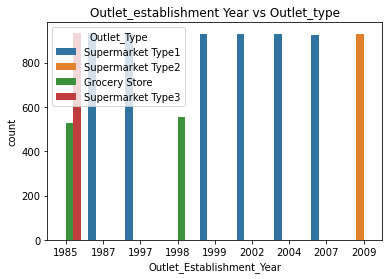

In [78]:
# anaslysis of Outlet_establishment Yera nd Outlet_type
sns.countplot(x="Outlet_Establishment_Year",hue = 'Outlet_Type',data=train)
plt.title("Outlet_establishment Year vs Outlet_type")

# obs:
super market type 2 was built in 2009 while others were built much earlier and are oldest

Text(0.5, 1.0, 'Outlet_establishment Year vs Outlet_Location')

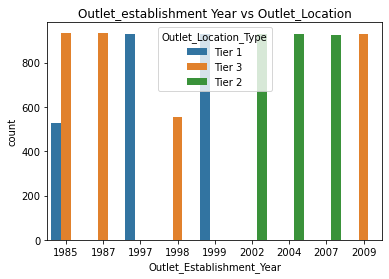

In [80]:
# anaslysis of Outlet_establishment Year nd Outlet_Location
sns.countplot(x="Outlet_Establishment_Year",hue = 'Outlet_Location_Type',data=train)
plt.title("Outlet_establishment Year vs Outlet_Location")

## obs:
tier1 and tier 3 got outlets from the strt where as tier 2 got outles from 2002

Text(0.5, 1.0, 'Outlet_establishment Year vs Item_Outlet_Sales')

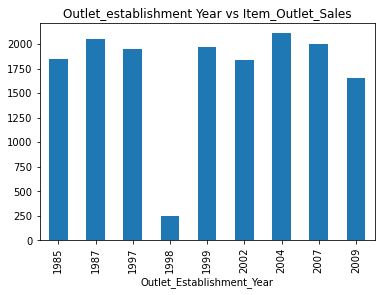

In [84]:
# analysis of Outlet_Establishment_Year and Outlet_Sales
train.groupby("Outlet_Establishment_Year")['Item_Outlet_Sales'].median().plot.bar()
#sns.barplot(x="Outlet_Establishment_Year",hue = 'Item_Outlet_Sales',data=train)
plt.title("Outlet_establishment Year vs Item_Outlet_Sales")

# obs:
sales in 1998 is the least remaining have smaller difference

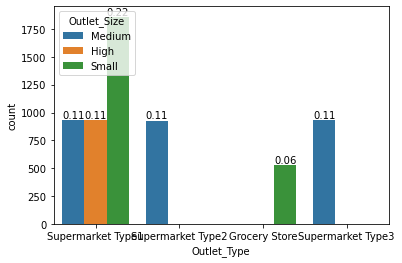

In [104]:
# analysis of Outlet_Size and Outlet_Type
bars = sns.countplot(x="Outlet_Type",hue = "Outlet_Size",data = train)
total = float(len(train))
for bar in bars.patches:
    value = round(bar.get_height()/total,2)
    val_pos_x = bar.get_x()+bar.get_width()/2
    val_pos_y = bar.get_height()
    bars.annotate(value,(val_pos_x,val_pos_y),va = 'bottom',ha='center')

## obs:
Supermarket type 1 are of all sizes whereas grocery stores are only small and Supermarket type 2, Supermarket type 3 are of medium size only.

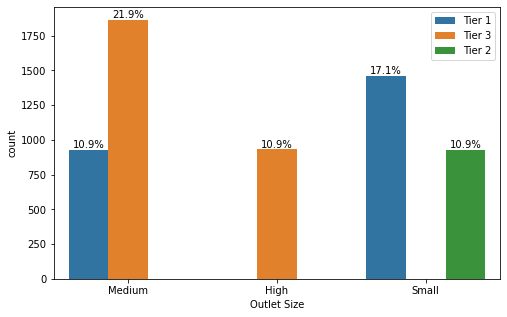

In [107]:
plt.figure(figsize = (8,5))
total = float(len(train))
ax = sns.countplot(x = 'Outlet_Size',hue = 'Outlet_Location_Type',data=train)
plt.xlabel('Outlet Size')
plt.legend(loc = 'upper right')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

## obs:
* tier 2 has only small outlets
* and observe we havent treated missing values in Outlet_Size
* tier 3 has max medium outltes
* tier1 has max small outlets

In [108]:
train["Outlet_Size"].isna().sum()

2410

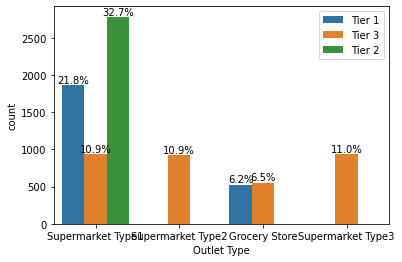

In [111]:
# analyis of Outlet_Location_Type and Outlet_Type
plt.figure(figsize = (6,4))
total = float(len(train))
ax = sns.countplot(x = 'Outlet_Type',hue = 'Outlet_Location_Type',data=train)
plt.xlabel('Outlet Type')
plt.legend(loc = 'upper right')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

## obs:
* tier2 has only Super market type1
* tier 1 has super market type1 and Grocery store
* tier 3 has all kind of stores

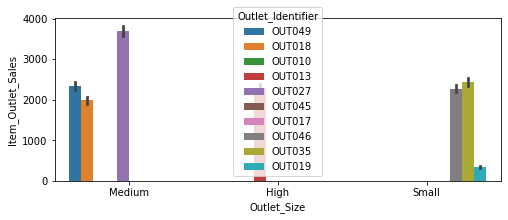

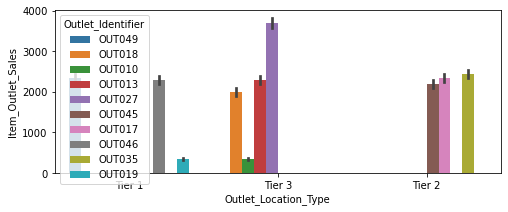

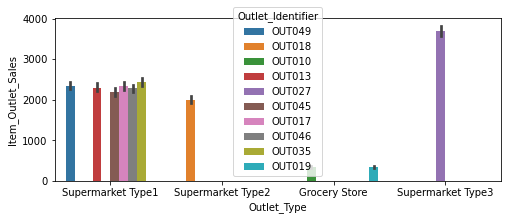

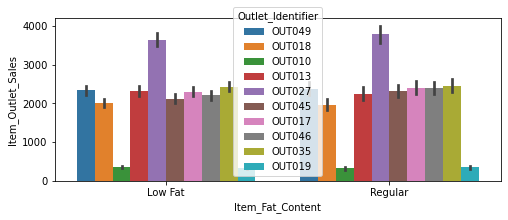

In [27]:
ordinal_features = [ "Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Fat_Content"]
for feature in ordinal_features:
    fig = plt.figure(figsize = (8,3))
    #fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    #train.groupby(by=[feature])["Item_Outlet_Sales"].median().plot.bar(hue="Outlet_Identifier")
    plt.ylabel("Item_Outlet_Sales")
    #sns.boxplot(x= feature, y= "Item_Outlet_Sales", data=train ,ax = axes[1])
    #sns.stripplot(x= feature, y= "Item_Outlet_Sales", data=train ,ax = axes[2])
    sns.barplot(x = feature , y="Item_Outlet_Sales" , data=train ,hue="Outlet_Identifier")
    plt.show()

### obs:
1. most of the outlets belong to super market type1
2.
